In [1]:
# Sales Analysis mini project
# Date: 01/04/2021
# Author: Van Huy Pham
# Reference: https://github.com/KeithGalli/Pandas-Data-Science-Tasks

# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

There are 12 csv files which represent 12 months of the 2019 sales. I will combine all 12 to one file for this analysis.

In [2]:
# Create a list of months to order our files
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Access the files' directory and get all the files of monthly sales in 2019. 
files = [file for file in os.listdir('./Sales_Data/')]

# Sort file names based on the order of month.
files.sort(key= lambda x: months.index(x.split('_')[1]))
files

['Sales_January_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_April_2019.csv',
 'Sales_May_2019.csv',
 'Sales_June_2019.csv',
 'Sales_July_2019.csv',
 'Sales_August_2019.csv',
 'Sales_September_2019.csv',
 'Sales_October_2019.csv',
 'Sales_November_2019.csv',
 'Sales_December_2019.csv']

In [3]:

# Combine all CSV files into one DataFrame variable all_months_dt
all_months_dt = pd.DataFrame()
for file in files:
    if file.endswith('.csv'):
        all_months_dt = all_months_dt.append(pd.read_csv("./Sales_Data/"+file))
all_months_dt.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
# Export all_months_dt into csv file
all_months_dt.to_csv('./Output/all_months_dt.csv',index=False)
all_months_dt.describe()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [5]:
#Check if dataset have null values
all_months_dt.isnull().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [6]:
# Check null columns
all_months_dt[all_months_dt.isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
25112,NaN,NaN,NaN,NaN,NaN,NaN
25113,NaN,NaN,NaN,NaN,NaN,NaN
25114,NaN,NaN,NaN,NaN,NaN,NaN
25115,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Drop rows with all NaN values
all_months_dt = all_months_dt.dropna(how='all')

# Convert 'Order Date' into datetime. Possibly have some unexpected string or data. Use parameter errors='coerce' to set those unexpected value to NaT
all_months_dt['Order Date'] = pd.to_datetime(all_months_dt['Order Date'],errors='coerce',infer_datetime_format=True)

In [8]:
# Check if 'Order Date' has null
all_months_dt['Order Date'].isnull().any()

True

In [9]:
# As expected, there are rows with unexpected values
all_months_dt[all_months_dt['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
...,...,...,...,...,...,...
23198,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
23337,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
23748,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [10]:
# Only take non-null 'Order Date' rows for further analysis
all_months_dt = all_months_dt[all_months_dt['Order Date'].notnull()]

In [11]:
all_months_dt['Order Date'].head()

0   2019-01-22 21:25:00
1   2019-01-28 14:15:00
2   2019-01-17 13:33:00
3   2019-01-05 20:33:00
4   2019-01-25 11:59:00
Name: Order Date, dtype: datetime64[ns]

In [12]:
# Create 'Month' column based on the 'Order Date'
all_months_dt['Month'] = all_months_dt['Order Date'].apply(lambda x: x.month)

# Check month
all_months_dt['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [13]:
#Convert 'Quantity Ordered' to int and 'Price Each' to float 
all_months_dt['Quantity Ordered'] = pd.to_numeric(all_months_dt['Quantity Ordered'])
all_months_dt['Price Each'] = pd.to_numeric(all_months_dt['Price Each'])
# Add a Sales comlum = Quantity * Price
all_months_dt['Sales'] = all_months_dt['Quantity Ordered'] * all_months_dt['Price Each']
all_months_dt['Sales']

0        700.00
1         14.95
2         23.98
3        149.99
4         11.99
          ...  
25112     14.95
25113      7.68
25114    400.00
25115     11.99
25116     99.99
Name: Sales, Length: 185950, dtype: float64

In [14]:
# There is no error. We're ready to analyze the dataset!
all_months_dt.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99


### Question 1: What was the best month for sales? How much was earned for that month?

In [15]:
# Sum of quantity ordered group by month and assign to month_sales (round to 2 decimal number)
monthly_sales = round(all_months_dt.groupby('Month').sum()['Sales'],2)
monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

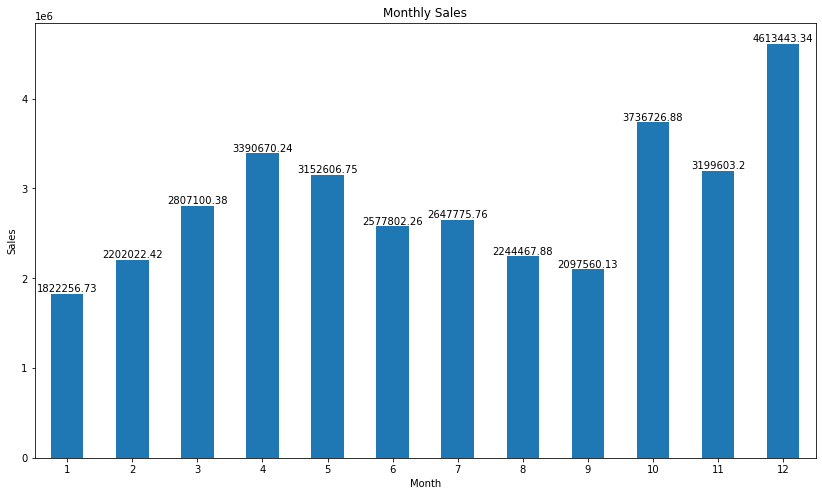

In [16]:
# Graph the monthly sales
plt.figure(figsize=(14, 8))
fig = monthly_sales.plot(kind='bar')

#Add value labels for each month
for rect in fig.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2  
    fig.annotate(y_value,(x_value, y_value),ha='center',va='bottom')

fig.set_title('Monthly Sales')
fig.set_ylabel('Sales')
fig.set_xlabel('Month')
plt.xticks(range(len(monthly_sales)),rotation='horizontal')
plt.show()

Conclusion: December (12) is the best month for sales.
Sales figure = 4613443.34 ($)

### Question 2: What city had the highest number of sales?

In [17]:
# Create a 'City' column with State abbreviation
def get_city(address):
    return address.split(', ')[1]
def get_state(address):
    return address.split(', ')[2].split(' ')[0]

all_months_dt['City'] = all_months_dt['Purchase Address'].apply(lambda x :  f'{get_city(x)} ({get_state(x)})')
all_months_dt.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [18]:
city_sales = round(all_months_dt.groupby('City').sum()['Sales'],2)
city_sales

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

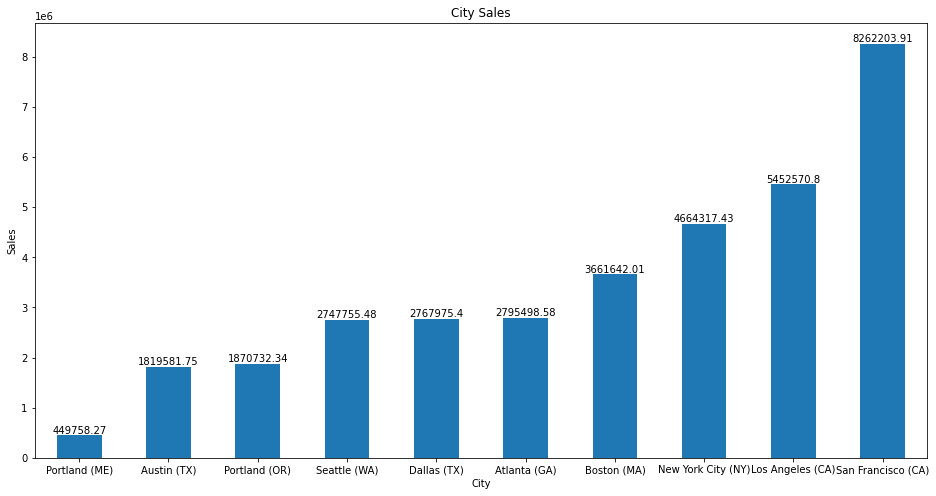

In [19]:
# Graph the city sales
plt.figure(figsize=(16, 8))
fig2 = city_sales.sort_values().plot(kind='bar')

#Add value labels for each city
for rect in fig2.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2  
    fig2.annotate(y_value,(x_value, y_value),ha='center',va='bottom')

fig2.set_title('City Sales')
fig2.set_ylabel('Sales')
fig2.set_xlabel('City')
plt.xticks(range(len(city_sales)),rotation='horizontal')
plt.show()

Conclusion: Sanfrancisco has the highest number of sales

### Question 3: what time should we display advertisement to maximize likelihood of customer's buying product?

In [20]:
all_months_dt.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [21]:
# Convet Order Date into datetime type for convenient analysis of time 
all_months_dt['Order Date'] = pd.to_datetime(all_months_dt['Order Date'])
# Get the hour from Order Date
hour = all_months_dt['Order Date'].apply(lambda x: x.hour)

# Calculate sum of ordered quantity groupby hour
hour_quantity = all_months_dt.groupby(hour).sum()['Quantity Ordered']

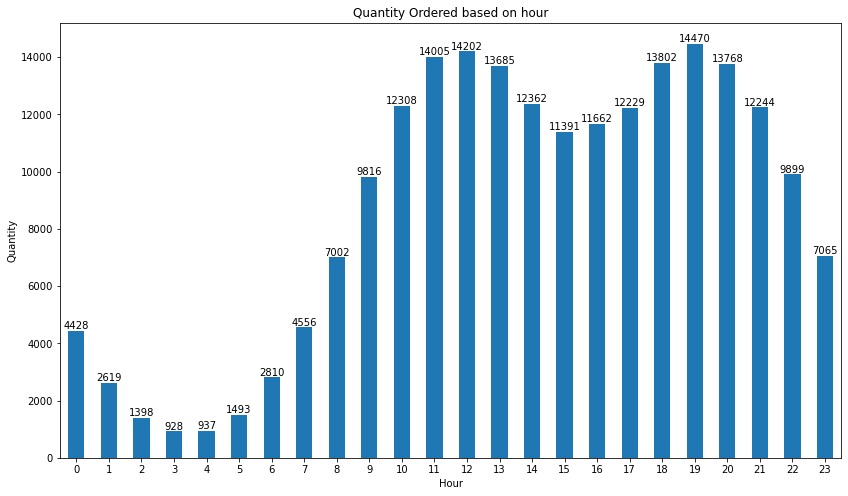

In [24]:
# Graph the quantity ordered based on hour
plt.figure(figsize=(14, 8))
fig3 = hour_quantity.plot(kind='bar')

#Add value labels for each hour
for rect in fig3.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2  
    fig3.annotate(y_value,(x_value, y_value),ha='center',va='bottom')

fig3.set_title('Quantity Ordered based on hour')
fig3.set_ylabel('Quantity')
fig3.set_xlabel('Hour')
plt.xticks(range(len(hour_quantity)),rotation='horizontal')
plt.show()

Conclusion: the hour of 19 (7pm) has the highest ordered quantity. The quantity also peaks at 12 (12 pm).  Hence, we should display advertisement at 12 and 19 to maximize likelihood of customer's buying product.

Additional question: At 12 (12pm) and 19 (7pm), what city orders the most quantity of product?

In [25]:
# Find the quantity ordered by each city throughout the hour of 12 and 19
city_order_12 = all_months_dt[hour == 12].groupby('City').sum()['Quantity Ordered'].rename('Orders at 12')
city_order_19 = all_months_dt[hour == 19].groupby('City').sum()['Quantity Ordered'].rename('Orders at 19')

print(city_order_12.sort_values())
print(city_order_19.sort_values())

City
Portland (ME)          181
Austin (TX)            761
Portland (OR)          820
Dallas (TX)           1125
Seattle (WA)          1134
Atlanta (GA)          1155
Boston (MA)           1553
New York City (NY)    1801
Los Angeles (CA)      2252
San Francisco (CA)    3420
Name: Orders at 12, dtype: int64
City
Portland (ME)          210
Austin (TX)            758
Portland (OR)          800
Seattle (WA)          1086
Dallas (TX)           1128
Atlanta (GA)          1176
Boston (MA)           1588
New York City (NY)    1965
Los Angeles (CA)      2263
San Francisco (CA)    3496
Name: Orders at 19, dtype: int64


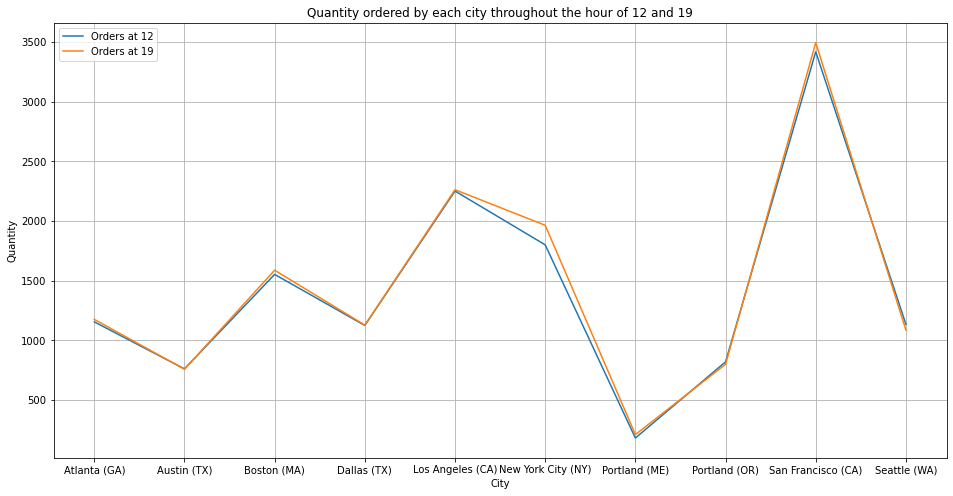

In [26]:
# Graph the quantity ordered by each city throughout the hour of 19
plt.figure(figsize=(16, 8))
plt.plot(city_order_12, label='Orders at 12')
plt.plot(city_order_19, label='Orders at 19')

plt.title('Quantity ordered by each city throughout the hour of 12 and 19')
plt.ylabel('Quantity')
plt.xlabel('City')
plt.xticks(range(len(city_order_19)),city_order_19.index.to_list())
plt.legend(loc='upper left')
plt.grid()
plt.show()

The highest quantity of order at 12 p.m. and 7 p.m. comes from San Francisco (CA) 

### Question 4: A person may buy 2 or more than 2 products at the same time. What products are most often sold together?

In [27]:
# Find all the rows have a duplicated 'Ordered ID'
inclusive_duplicated = all_months_dt[all_months_dt.duplicated('Order ID',keep=False)]
inclusive_duplicated.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin (TX)
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin (TX)
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles (CA)
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles (CA)
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City (NY)


In [28]:
# Select only "Order ID" and "Product"
inclusive_duplicated = inclusive_duplicated[['Order ID','Product']]

# Join product together groupby Order ID
inclusive_duplicated['Product'] = inclusive_duplicated.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

# Drop duplicated rows
inclusive_duplicated.drop_duplicates(inplace=True)
inclusive_duplicated.head()

,Order ID,Product
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [29]:
#Iterate through the product the print the pair of 3 products bought together
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in inclusive_duplicated['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

# Display pairs of 2 products that are often sold together.
for key, values in count.most_common(5):
    print(key)

('iPhone', 'Lightning Charging Cable')
('Google Phone', 'USB-C Charging Cable')
('iPhone', 'Wired Headphones')
('Google Phone', 'Wired Headphones')
('Vareebadd Phone', 'USB-C Charging Cable')


### Question 5: What product sold the most? Why do you it sold the most?

In [30]:
# Calculate sum of ordered quantity group by product.
product_quantity_ordered = all_months_dt.groupby('Product').sum()['Quantity Ordered']

In [31]:
product_quantity_ordered.sort_values()

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int64

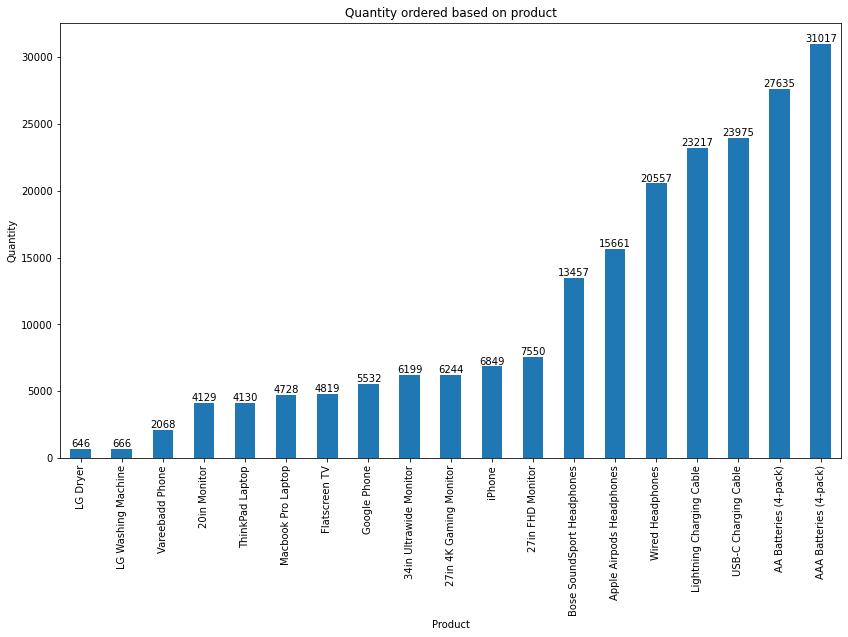

In [32]:
# Graph the quantity ordered for each product
plt.figure(figsize=(14, 8))
fig4 = product_quantity_ordered.sort_values().plot(kind='bar')

#Add value labels for each hour
for rect in fig4.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2  
    fig4.annotate(y_value,(x_value, y_value),ha='center',va='bottom')

fig4.set_title('Quantity ordered based on product')
fig4.set_ylabel('Quantity')
fig4.set_xlabel('Product')
plt.xticks(range(len(product_quantity_ordered)))
plt.show()

AAA and AA batteries has the most ordered quantity  while LG dryer and washing machine has the least amount of quantity.

I will graph a dual axis with bar chart as quantity and line chart as price of each product to evaluate the relationship

In [33]:
# Calculate average of price for each product
product_price = all_months_dt.groupby('Product').mean()['Price Each']

In [34]:
product_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<Figure size 1008x576 with 0 Axes>

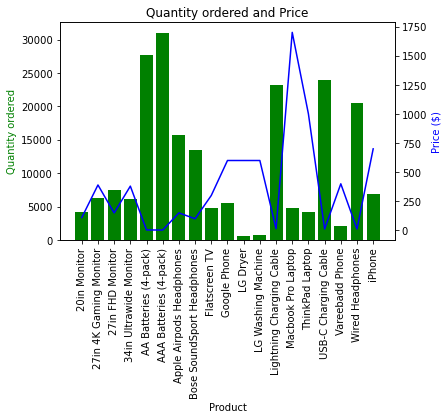

In [35]:
# Graph the relation between quantity ordered and price 
plt.figure(figsize=(14, 8))

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
products = [product for product,quantity in product_quantity_ordered.items()]

ax1.bar(products,product_quantity_ordered,color='g')
ax2.plot(products, product_price,'b-')

plt.title('Quantity ordered and Price')
ax1.set_ylabel('Quantity ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xlabel('Product')
ax1.set_xticks(range(len(product_quantity_ordered)))
ax1.set_xticklabels(products, rotation='vertical')
plt.show()

According to the graph, there are relationship between quantity ordered and price of each product. Products with low price have more ordered quantity than products with high prices.
However, there are cases, specically for example 'LG dryer' and 'Macbook Pro Laptop, where Macbook's price is higher than LG dryer but the ordered quantity is still higher. 
Further analysis and deeper evaluation should be conducted for these cases.

Author: Van Huy Pham